In [ ]:
# Import required packages:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
!pip install scikit-multilearn==0.2.0
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/All_Corpora_normalized-2023.csv")
df

,content,Anger,Anticipation,Disgust,Fear,Joy,Love,Optimism,Pessimism,Sadness,Surprise,Trust,Neutral
0,l2a ana msh gamed bs 3al a2al msh bad5ol abden...,1,0,1,0,0,0,0,0,0,0,0,0
1,fe ramadan msh baftar lama yekoun 3andi emteha...,0,1,0,0,0,0,0,0,1,0,0,0
2,ftark 3andi anhrda ashan anta sha2yan t3ala kol,0,0,0,0,1,1,0,0,0,0,0,0
3,da eli kont 3awza asafer feh aslun ashan 3ed m...,0,0,0,0,0,0,0,0,0,0,1,0
4,sa7ya mn el sa3a ashan 3andi tasleim el sa3a a...,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10504,ana mot2kd enha 7aja 7lwa 3ayto,0,1,0,0,0,0,0,0,0,0,1,0
10505,dalw2ty ana mot2kd mn hwar als2oot da,0,0,0,0,0,0,0,0,0,0,1,0
10506,sa7 ala ana 7ases anto nasetony 5als aw msh 7a...,0,0,0,0,0,0,0,0,1,0,1,0
10507,l2a ana mot2kd eny htbst,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['content', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Love',
       'Optimism', 'Pessimism', 'Sadness', 'Surprise', 'Trust', 'Neutral'],
      dtype='object')


In [ ]:
df.info() #print inforamation about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10509 entries, 0 to 10508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       10509 non-null  object
 1   Anger         10509 non-null  int64 
 2   Anticipation  10509 non-null  int64 
 3   Disgust       10509 non-null  int64 
 4   Fear          10509 non-null  int64 
 5   Joy           10509 non-null  int64 
 6   Love          10509 non-null  int64 
 7   Optimism      10509 non-null  int64 
 8   Pessimism     10509 non-null  int64 
 9   Sadness       10509 non-null  int64 
 10  Surprise      10509 non-null  int64 
 11  Trust         10509 non-null  int64 
 12  Neutral       10509 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.0+ MB


In [ ]:
rowSums = df.iloc[:,1:].sum(axis=1) # filter rows with all zeros (No label)
df= df.loc[rowSums>0]

In [ ]:
# filter pure numbers in content column:
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if not word.isnumeric()]))

In [ ]:
#  string.punctuation
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
#remove punctuations
def remove_punctuations(tweet):
  sentence = tweet.translate(str.maketrans('', '', string.punctuation))
  return sentence
df['content'] = df['content'].apply(lambda x:remove_punctuations(x))

In [ ]:
df.drop_duplicates(inplace= True) # drop duplicated rows

In [ ]:
count = len(df[(df['Disgust'] == 1) & (df.iloc[:, 1:].sum(axis=1) == 1)])
print("Number of rows =1 and all other emotions=0:", count)



Number of rows =1 and all other emotions=0: 11


In [ ]:
df.info() #print inforamation about dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10509 entries, 0 to 10508
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       10509 non-null  object
 1   Anger         10509 non-null  int64 
 2   Anticipation  10509 non-null  int64 
 3   Disgust       10509 non-null  int64 
 4   Fear          10509 non-null  int64 
 5   Joy           10509 non-null  int64 
 6   Love          10509 non-null  int64 
 7   Optimism      10509 non-null  int64 
 8   Pessimism     10509 non-null  int64 
 9   Sadness       10509 non-null  int64 
 10  Surprise      10509 non-null  int64 
 11  Trust         10509 non-null  int64 
 12  Neutral       10509 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


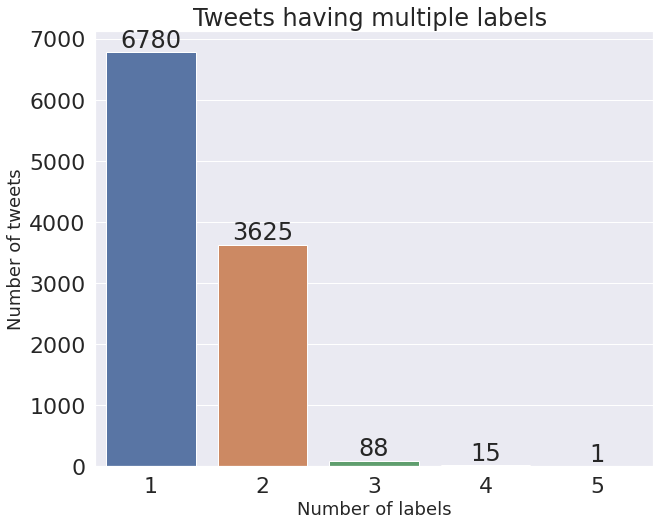

In [ ]:
# plot the bar plot of no of labels frequency
rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
sns.set(font_scale = 2)
plt.figure(figsize=(10,8))

labels, counts = multiLabel_counts.index, multiLabel_counts.values
ax = sns.barplot(x=labels, y=counts)

plt.title("Tweets having multiple labels ")
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Number of labels', fontsize=18) #adding the text labels
rects = ax.patches
labels = multiLabel_counts.sort_index()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
# Get the count of each emotion label in the dataset
label_counts = df.iloc[:, 1:].sum()

# Calculate the percentage of each label
label_percents = label_counts / len(df) * 100

# Print the percentage of each label
print(label_percents)


Anger           12.151489
Anticipation     9.515653
Disgust         24.616995
Fear             8.697307
Joy             11.218955
Love             8.478447
Optimism         8.212009
Pessimism        6.404035
Sadness         15.025216
Surprise        14.844419
Trust            9.705966
Neutral          7.764773
dtype: float64


In [ ]:
# Split each tweet into individual words using whitespace as the delimiter
words = df['content'].str.split()

# Find the shortest and longest words in the corpus
shortest_word = min([word for tweet in words for word in tweet], key=len)
longest_word = max([word for tweet in words for word in tweet], key=len)

# Print the shortest and longest words
print('Shortest word:', shortest_word)
print('Longest word:', longest_word)


Shortest word: w
Longest word: hansummerizedouchebagerrize


In [ ]:
# Count the total number of words in all the tweets
word_count = sum([len(tweet) for tweet in words])

# Calculate the average length of the tweets in words
average_length = word_count / len(df)

# Print the average length of the tweets
print('Average tweet length:', average_length)


Average tweet length: 10.22847083452279


In [ ]:
# Flatten the list of words into a single list
all_words = [word for tweet in words for word in tweet]

# Count the total number of words in the corpus
total_words = len(all_words)

# Count the number of unique words in the corpus
unique_words = len(set(all_words))

# Print the total number of words and the number of unique words
print('Total words:', total_words)
print('Unique words:', unique_words)


Total words: 107491
Unique words: 21661


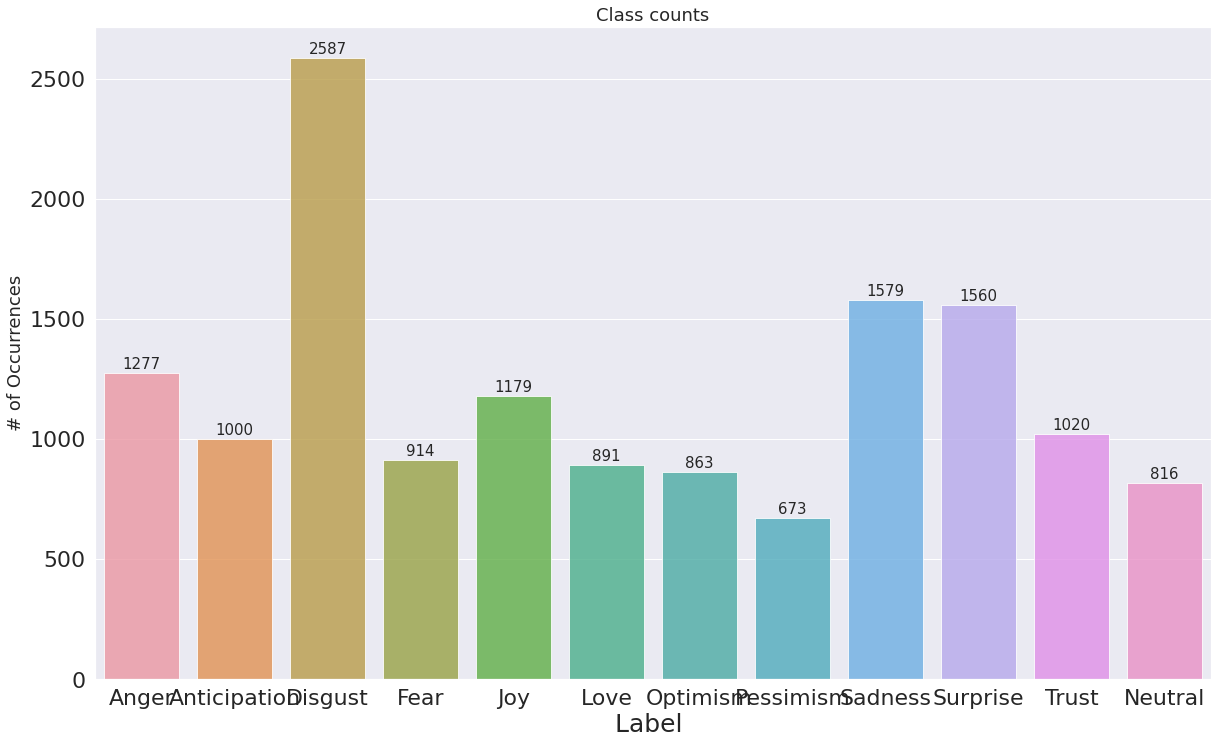

Index(['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Love', 'Optimism',
       'Pessimism', 'Sadness', 'Surprise', 'Trust', 'Neutral'],
      dtype='object')
[1277 1000 2587  914 1179  891  863  673 1579 1560 1020  816]


In [ ]:
# Exploratory data analysis
# plot the bar plot of labels frequency
y=df.iloc[:,1:].sum()
plt.figure(figsize=(20,12))

labels, counts = y.index, y.values
ax = sns.barplot(x=labels, y=counts, alpha=0.8)

plt.title("Class counts", fontsize=18)
plt.ylabel('# of Occurrences', fontsize=18)
plt.xlabel('Label ', fontsize=25)

rects = ax.patches
labels = y.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)

plt.show()
print(y.index)
print(y.values)

In [ ]:
X= df["content"] # Tweets is the feature column

In [ ]:
neutral_and_other = ((df['Neutral'] == 1) & (df.iloc[:, 1:-1].sum(axis=1) > 0))
print(df[neutral_and_other])


Empty DataFrame
Columns: [content, Anger, Anticipation, Disgust, Fear, Joy, Love, Optimism, Pessimism, Sadness, Surprise, Trust, Neutral]
Index: []


In [ ]:
# Define a word mapping dictionary
word_map = {
    'anaa':'ana',
    'mesh': 'msh','mosh':'msh','mush':'msh',
    '3ndi': '3andi','3andy':'3andi',
    'bas': 'bs',
    '3ashan': 'ashan','3shan':'ashan',
    'lessa':'lesa','lsa':'lesa',
    'hahahahahhahaha': 'haha','hahahaha': 'haha','hahahahaha':'haha','hahahahaha':'haha','hahhahahaahahhaah':'haha','hahahhahahahahahhahahhah':'haha','hahahahahaha':'haha',
    'hahahhahaha':'haha','hahahahahha':'haha','hahahahahahaha':'haha','hahahahahahaha':'haha',
    'hahahahahahahahah':'haha','ahahahahahaahah':'haha','hhahaa':'haha','xd':'','xdd':'','xx':'','xs':'','hhahaahaabhahaa':'haha','hhahaahaaha':'haha',
    'men' : 'mn',
    'ehh':'eh','hhahaahaaha':'haha',
    'bokraa': 'bokra',
    'keda': 'kda','kdaa':'kda','kida':'kda','kdda':'kda',
    'houwa':'howa','hwa':'howa','hoa':'howa',
    'gidan':'gedn','ggydan':'gedn','gedan':'gedn',
    'bas': 'bs',
    'begad': 'bgd','begd': 'bgd','bgad': 'bgd','begaad':'bgd','begadd':'bgd',
    '2olt':'olt',
    'ashouf':'ashof',
    '3ala': 'ala',
    'walahy': 'walahi','wallahi':'walahi','wallahy': 'walahi','wlahy':'walahi','walahe':'walahi','wlahi':'walahi','wallaheeu01f972':'walahi',
    'awyy': 'awi','awy': 'awi','awe': 'awi','awii': 'awi',
    'inshaallah': 'isa','inshaalah': 'isa','inshalaah':'isa','inshallah':'isa','insha2allaah':'isa','inshaallahqody':'isa','inshaallahw':'isa',
    'fash5': 'fashk','fashi5':'fashk', 
    'wlad': 'welad', 
    'ba2a': 'b2a',
    'laa': 'l2a', 'la': 'l2a','lalalalalala':'l2a','u200d':'','lalalalalalalala':'l2a','lalalaalalala':'l2a',
    'ntfaham3ashan':'ntfaham ashan',
    'wes5a': 'weskha',
    'nafsy':'nafsi','nefsi':'nafsi','nfsy':'nafsi','nfsi':'nafsi','nefsy':'nafsi','nafsyu01f90c':'nafsi','nafse':'nafsi',
    '5alas':'khalas','5ales':'khales','5las':'khalas',
    'mmkn':'momkn','momken':'momkn','mmknn':'momkn','momkin':'momkn',
    'eswd':'aswad','eswed':'aswad','aswd':'aswad','eswad':'aswad',
    'abyd':'abyad','abyed':'abyad','abydd':'abyad','abyaad':'abyad','abyadd':'abyad',
    'aftkrr':'aftekr','aftker':'aftekr',
    'ma2ol':'ma32ol',
    'ambar7':'embar7',
    'hlawa':'halawa','7lawa':'halawa','ahlaa':'ahla',
    'azara2':'azra2','azr2':'azra2','azra':'azra2',
    'delwa2ty':'delw2ty',
    'gd3an':'ged3an',
    'wla':'wala',
    'yanhar':'ynhar',
    'tab':'tb',
    '3awza':'ayza','3yza':'ayza','3ayza':'ayza',
    'gmaal':'gamal','gmal':'gamal',
    'elgmal':'elgamal',
    'feiki':'feki',
    'ezay':'ezai',
    'mleesh':'mlesh',
    'shata':'sheta',
    '3lena':'3alena',
    'aslan':'asln','aslun':'asln',
    'wa7d':'wahed','wa7ed':'wahed', 'wa7da':'wahda','w7da':'wahda',
    'alklam':'elklam',
    'ma5dtsh':'makhdtsh',
    'yomeen':'youmeen',
    '3ashaneek':'ashanek','3ashanek':'ashanek',
    'dma8y':'dema8i','dma8i':'dema8i',
    'bqnyadmeen':'bnyadmeen','bnyadmen':'bnyadmeen',
    'yalemby':'ya lembi','lembyy':'lembi','lemby':'lembi','ylembi':'ya lembi','lembay':'lembi','lembii':'lembi','lemb':'lembi','lmby':'lembi',
    'ylemby':'ya lembi','ylembyy':'ya lembi',
    'emthan':'emtehan','emtahan':'emtehan','emte7an':'emtehan','emta7an':'emtehan','emt7an':'emtehan',
    '7ayah':'hayat','7ayaat':'hayat','7ayaty':'hayati','7ayati':'hayati','hayaty':'hayati',
    'habiby':'habibi','7abiby':'habibi','7abibi':'habibi','7abebi':'habibi','7abeby':'habibi',
    'ba7ebk':'bahebk',
    'mota7ames':'motahames','mota7amesa':'motahamesa','mota7amesmabsoot':'motahames mabsoot','dmota7ames':'motahames',
    'mabsoot':'mabsot','mabsoota':'mabsota','mabsotah':'mabsota',
    'yom':'youm','yum':'youm','enhrda':'enharda',
    'akid':'akeed',
    'cutee':'cute',
    'ma3ytshu01f972':'ma3yatshe',
    'far7an3shan':'far7an ashan', 'mar3obue412ue412':'mar3ob','u2069u2066u2069':'','160u01f979u01f979u01f979u01f979':'','gadwalu200du200du200dmsh':'gadwal msh','pin28fe9478':'pin',
    'hehehehehehe':'hehe','lololololololyana':'wow ana','ra8hhahaahaaad':'','lololololololololyh':'wow','wtfjfjfjfjfj':'wtf','publicfavor':'public favor',
    'likeretweetmachinegun':'like retweet machine gun','accentvoice':'accent voice','latelyvthink':'lately think','writingmust':'writing must','likegimmick':'like gimmick',
    'nitpickingchildrens':'night picking children','madamplanner':'madam planner','takingquick':'taking quick','lmfaooibxjxnxjxjxn':'','pisseddidnt':'pissed didnt',
    'shockednabsolutely':'shocked absolutely','breakdownpanic':'breakdown panic','presidentxa0andrzejxa0dudaxa0observed':'president and served',
    'uf979':'','uf972':'',

}

# add more word variations and correct forms as needed

# Define a function to apply word mapping to the text data
def apply_word_map(text):
    words = word_tokenize(text)
    normalized_words = [word_map.get(word, word) for word in words]
    return ' '.join(normalized_words)


# Apply word mapping to the text data
X_normalized = X.apply(apply_word_map)

# Replace the original "content" column with the normalized text
df['content'] = df['content'].apply(apply_word_map)

df
   

,content,Anger,Anticipation,Disgust,Fear,Joy,Love,Optimism,Pessimism,Sadness,Surprise,Trust,Neutral
0,l2a ana msh gamed bs 3al a2al msh bad5ol abden...,1,0,1,0,0,0,0,0,0,0,0,0
1,fe ramadan msh baftar lama yekoun 3andi emteha...,0,1,0,0,0,0,0,0,1,0,0,0
2,ftark 3andi anhrda ashan anta sha2yan t3ala kol,0,0,0,0,1,1,0,0,0,0,0,0
3,da eli kont ayza asafer feh asln ashan 3ed mel...,0,0,0,0,0,0,0,0,0,0,1,0
4,sa7ya mn el sa3a ashan 3andi tasleim el sa3a a...,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10504,ana mot2kd enha 7aja 7lwa 3ayto,0,1,0,0,0,0,0,0,0,0,1,0
10505,dalw2ty ana mot2kd mn hwar als2oot da,0,0,0,0,0,0,0,0,0,0,1,0
10506,sa7 ala ana 7ases anto nasetony 5als aw msh 7a...,0,0,0,0,0,0,0,0,1,0,1,0
10507,l2a ana mot2kd eny htbst,0,1,0,0,1,0,0,0,0,0,1,0


The maximum length of a tweet in words is: 35
The maximum length of a tweet in characters (excluding spaces) is: 133


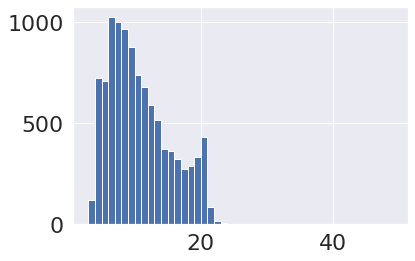

In [ ]:
#The distribution of the number of words in tweets
lens = df.content.str.split().str.len()
lens.hist(bins = range(3,50))
max_length = df.content.str.split().str.len().max()
print("The maximum length of a tweet in words is:", max_length)
max_length_no_spaces = df.content.str.replace(' ','').str.len().max()
print("The maximum length of a tweet in characters (excluding spaces) is:", max_length_no_spaces)



In [ ]:
# Count the frequency of each word in the tweets and print the most common 20 words
count_vector = CountVectorizer(lowercase = True)
bag_of_words= count_vector.fit_transform(X_normalized)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vector.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]


[('ana', 4105),
 ('el', 3103),
 ('msh', 2176),
 ('ashan', 1818),
 ('zehe2t', 1464),
 ('mn', 1344),
 ('ya', 1308),
 ('msd2', 1139),
 ('youm', 1128),
 ('bs', 1032),
 ('3andi', 835),
 ('bahebk', 725),
 ('aswad', 706),
 ('sure', 688),
 ('kan', 678),
 ('weskha', 675),
 ('kda', 623),
 ('walahi', 621),
 ('ma', 576),
 ('awi', 569)]

In [ ]:

# Split each tweet into individual words using whitespace as the delimiter
words = df['content'].str.split()

# Concatenate all the lists of words into a single list
all_words = [word for tweet in words for word in tweet]

# Print all the words in the corpus
print(all_words)


['l2a', 'ana', 'msh', 'gamed', 'bs', '3al', 'a2al', 'msh', 'bad5ol', 'abden', '3al', 'nas', 'w', 'aksef', 'nafsi', 'ashan', '3andi', 'fara8', 'fe', 'ramadan', 'msh', 'baftar', 'lama', 'yekoun', '3andi', 'emtehan', 'ashan', 'mas2atsh', 'leh', 'bas2at', 'bardo', 'ftark', '3andi', 'anhrda', 'ashan', 'anta', 'sha2yan', 't3ala', 'kol', 'da', 'eli', 'kont', 'ayza', 'asafer', 'feh', 'asln', 'ashan', '3ed', 'meladi', 'bs', '3andi', 'emtehan', 'b3daha', 'b', 'kam', 'youm', 'fa', 'msh', 'h3raf', 'sa7ya', 'mn', 'el', 'sa3a', 'ashan', '3andi', 'tasleim', 'el', 'sa3a', 'ala2i', 'el', 'dr', 'abliha', 'b', 'min', 'bey2olena', 'ana', 'msh', 'hayenfa3', 'ashan', 'kollohom', '3andi', 'fe', 'twitter', 'la2', 'rola', 'wenaby', 'mat3asabeeni', 'ana', 'marohtesh', 'ashan', '3andi', 'corona', 'banam', 'ashan', '3andi', 'soda3', 'w', 'bas7a', 'b', 'nafs', 'el', 'soda3', '3andi', 'beit', 'orayeb', 'mel', 'gam3a', 'bs', 'ana', 'arga3', 'el', 'sheikh', 'zayed', 'ashan', 'ashof', 'omi', 'roht', 'a2ool', 'lel', 'd

In [ ]:
# number of words in the dataset
# Concatenate all the text data in your dataset into a single string
corpus = ' '.join(df['content'])

# Split the string into individual words using whitespace as the delimiter
words = corpus.split()

# Get the total number of words in the corpus
num_words = len(words)

# Create a set from the list of words to remove duplicates
unique_words = set(words)


# Get the total number of unique words in the corpus
num_unique_words = len(unique_words)

# Create a list of words that are more than 10 characters long
#long_words = [word for word in words if len(word) > 10]


print('Total number of words:', num_words)
print('Total number of unique words:', num_unique_words)
#print(long_words)
print(unique_words)




Total number of words: 107484
Total number of unique words: 21605
{'nakad', 'hageleek', 'koo', 'pants', 'far2a', 'ed3ele', 'hageebo', 'enjoying', 'beyewga3ni', 'hy3ml', 'beleh', 'inferior', 'maro7tsh', 'tax', 'baw3d', 'royal', 're7la', 'sadeek', 'drums', 'model', 'ya3mel', 'ehtmami', 'you', 'uf', 'mayel', 'asptele', 'blu', 'cake', 'shiit', 'mariz', 'ph', 'mlazemny', 'socials', 'mens', 'dehk', 'wrote', 'argaa', 'hanager', 'hena', 'gad3na', '7alawet', 'm3rofa', 'mabeygesh', 'military', 'restaurants', 'da7', 'stunned', 'shorty', 'eskot', 'ma5loo2ean', 'bash3a', 'a8lab', 'tol', 'yazeft', 'belmontenwe', 'wow', 'talker', '7asil', 'mlt2ser', 'mdkhl', 'es3af', 'kolo', 'sim', 'ba2', 'ent7art', 'gmbeek', 'iq', 'bafkar', '7ass', 'drake', 'bt3mlo', 'mofeed', 'akimzy', 'brothers', 'shabh', 'y3alemny', 'masa7t', 'bafraa', 'freaking', 'nz3l', 'ha3milha', 'moltaka', 'mnayl', 'maywla3o', 'positions', 'belah', 'teezek', 'sahrna', '6ad', '3arik', 'gesmy', 'knew', 'fekret', 'akn3', 'bta3i', '3adwa', 'yala

In [ ]:
!pip install python-Levenshtein
import Levenshtein

# Initialize an empty dictionary to store the most similar word for each word
most_similar_words = {}

# Loop over each unique word in your corpus and find the most similar word in the list
for target_word in set(all_words):
    if target_word in most_similar_words:
        # If the most similar word for the target word has already been computed, use it
        most_similar_word = most_similar_words[target_word]
        distance = Levenshtein.distance(target_word, most_similar_word)
    else:
        # Otherwise, find the most similar word and store it in the dictionary
        min_distance = float('inf')
        most_similar_word = ''
        for word in set(all_words):
            if word == target_word or word in most_similar_words.values():
                continue
            distance = Levenshtein.distance(target_word, word)
            if distance < min_distance:
                min_distance = distance
                most_similar_word = word
        most_similar_words[target_word] = most_similar_word
    print('Target word:', target_word)
    print('Most similar word:', most_similar_word)
    print('Levenshtein distance:', distance)



Streaming output truncated to the last 5000 lines.
Most similar word: 2udam
Levenshtein distance: 5
Target word: asf
Most similar word: a5f
Levenshtein distance: 3
Target word: fakreeny
Most similar word: fakrteny
Levenshtein distance: 7
Target word: 3azabhom
Most similar word: 3alehom
Levenshtein distance: 8
Target word: t722y
Most similar word: t7a22y
Levenshtein distance: 4
Target word: thankful
Most similar word: thanku
Levenshtein distance: 8
Target word: yasety
Most similar word: 7asety
Levenshtein distance: 5
Target word: gfbf
Most similar word: gff
Levenshtein distance: 4
Target word: bummed
Most similar word: pumped
Levenshtein distance: 6
Target word: ysahl
Most similar word: sahl
Levenshtein distance: 4
Target word: stick
Most similar word: stock
Levenshtein distance: 4
Target word: recommendations
Most similar word: recommend
Levenshtein distance: 15
Target word: 6e7t
Most similar word: ng7t
Levenshtein distance: 4
Target word: 7ewarat
Most similar word: 7warat
Levenshtein 

In [ ]:
# Export the modified DataFrame to a CSV file
df.to_csv('/content/All_Corpora_normalized_updated-2023.csv', index=False)
